✅ Modelo cargado correctamente.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
🔍 Predicción: Clase 1, Confianza: 99.73%


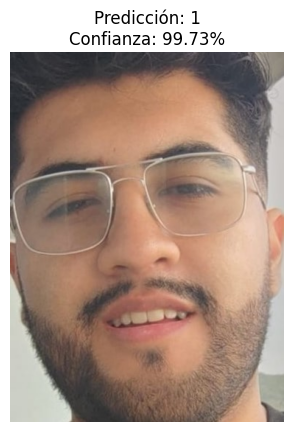

In [7]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Cargar el modelo guardado
model_path = 'redes_entrenadas/ReconocimientoFacialV02.h5'
if not os.path.exists(model_path):
    print(f"⚠️ Error: No se encontró el modelo en '{model_path}'. Verifica la ruta.")
    exit()

model = load_model(model_path)
print("✅ Modelo cargado correctamente.")

# Definir la ruta de una imagen de prueba
image_path = "D:/taller/dataset/002_luis/001_luis.jpg"  # Cambia esta ruta a una imagen válida

if not os.path.exists(image_path):
    print(f"⚠️ Error: No se encontró la imagen en '{image_path}'. Verifica la ruta.")
    exit()

# Cargar y preprocesar la imagen
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir a RGB
img_resized = cv2.resize(img, (128, 128))   # Ajustar al tamaño de entrada del modelo
img_resized = img_resized.astype('float32') / 255.0  # Normalizar
img_resized = np.expand_dims(img_resized, axis=0)  # Agregar dimensión para batch

# Hacer la predicción
prediccion = model.predict(img_resized)
predicted_class = np.argmax(prediccion, axis=1)[0]
confidence = np.max(prediccion) * 100

# Mostrar el resultado
print(f"🔍 Predicción: Clase {predicted_class}, Confianza: {confidence:.2f}%")

# Mostrar la imagen con la predicción
plt.imshow(img)
plt.title(f"Predicción: {predicted_class}\nConfianza: {confidence:.2f}%")
plt.axis('off')
plt.show()
